Este cuaderno incluye el código utilizado para el experimento: «Reconstrucción a partir de datos sin procesar» correspondiente a la sección 3.2.2

# Módulos

In [ ]:
import os

from cil.io import ZEISSDataReader, TIFFWriter
from cil.processors import TransmissionAbsorptionConverter, Slicer
from cil.recon import FDK
from cil.utilities.display import show2D, show_geometry
from cil.utilities.jupyter import islicer, link_islicer
from matplotlib.pyplot import imshow, matshow, show, colorbar, axis

from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow, matshow, show, colorbar, axis

# remove some annoying warnings
import logging
logger = logging.getLogger('dxchange')
logger.setLevel(logging.ERROR)

## Rutas para archivos

In [37]:
path = '/home/daniellara/datos/usb'
path_resultados = '/mnt/test1dev/TIC/02CIL-Demos/resultados'

# Reconstrucción a partir de datos sin procesar

In [42]:
filename = os.path.join(path, "4_2014-03-20_1704_12/tomo-A/gruppe 4_tomo-A.txrm")

data_transmision = ZEISSDataReader(file_name=filename).read()

In [43]:
type(data_transmision)

cil.framework.framework.AcquisitionData

In [44]:
print(data_transmision)

Number of dimensions: 3
Shape: (801, 1024, 1024)
Axis labels: ('angle', 'vertical', 'horizontal')



Geometría de los datos

In [45]:
print(data_transmision.geometry)

3D Cone-beam tomography
System configuration:
	Source position: [  0.        , -95.04837036,   0.        ]
	Rotation axis position: [0., 0., 0.]
	Rotation axis direction: [0., 0., 1.]
	Detector position: [ 0.        , 55.08220291,  0.        ]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [1024 1024]
	Pixel size: [0.06585435 0.06585435]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 801
	Angles 0-20 in radians:
[-3.1415493, -3.1337836, -3.125914 , -3.1180005, -3.1102147, -3.1023476,
 -3.0945017, -3.0866468, -3.0787883, -3.0709336, -3.0630753, -3.0552294,
 -3.0473533, -3.0395627, -3.0316472, -3.0238035, -3.0159593, -3.0080967,
 -3.0002263, -2.9924133]
Distances in units: units distance


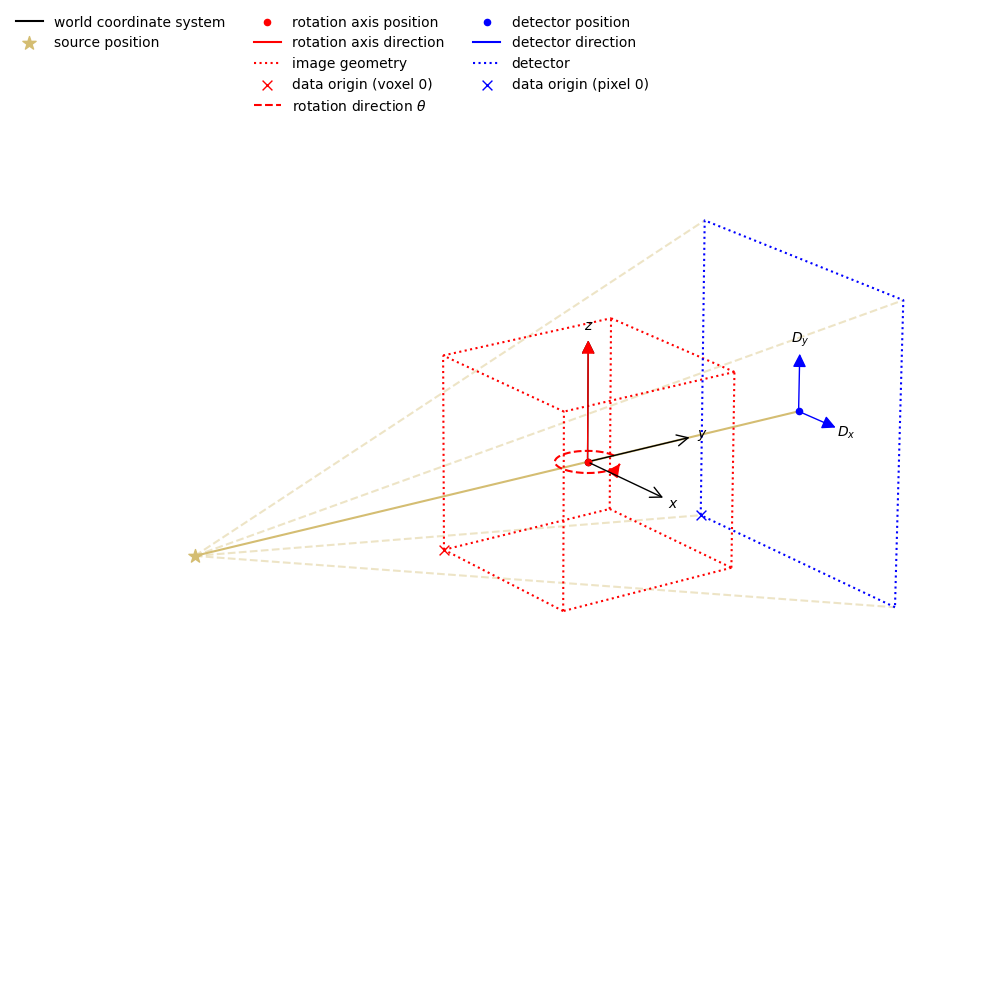

In [46]:
show_geometry(data_transmision.geometry)

In [75]:
data_transmision.as_array().shape

(801, 1024, 1024)

In [76]:
data_transmision.as_array()[:,210,:].shape

(801, 1024)

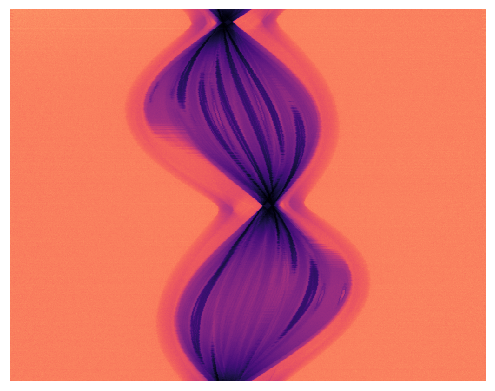

In [70]:
imagen = matshow(data_transmision.as_array()[:,210,:], cmap='magma')
axis('off')

In [77]:
data_transmision.as_array()[210,:,:].shape

(1024, 1024)

(-0.5, 1023.5, 1023.5, -0.5)

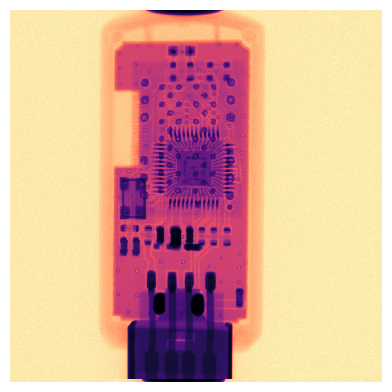

In [71]:
imagen = matshow(data_transmision.as_array()[210,:,:], cmap='magma')
axis('off')

In [50]:
data = TransmissionAbsorptionConverter()(data_transmision)

(-0.5, 1023.5, 1023.5, -0.5)

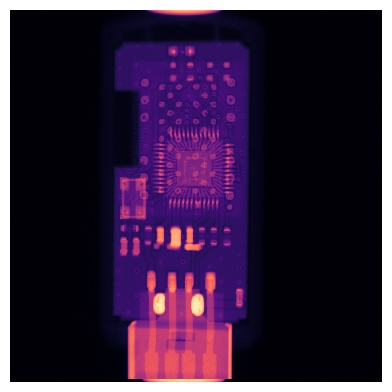

In [73]:
imagen = matshow(data.as_array()[210,:,:], cmap='magma')
axis('off')

In [52]:
data.reorder(order='tigre')

In [53]:
ig = data.geometry.get_ImageGeometry()

In [127]:
fdk =  FDK(data, ig)
recon = fdk.run()

FDK recon

Input Data:
	angle: 801
	vertical: 1024
	horizontal: 1024

Reconstruction Volume:
	vertical: 1024
	horizontal_y: 1024
	horizontal_x: 1024

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



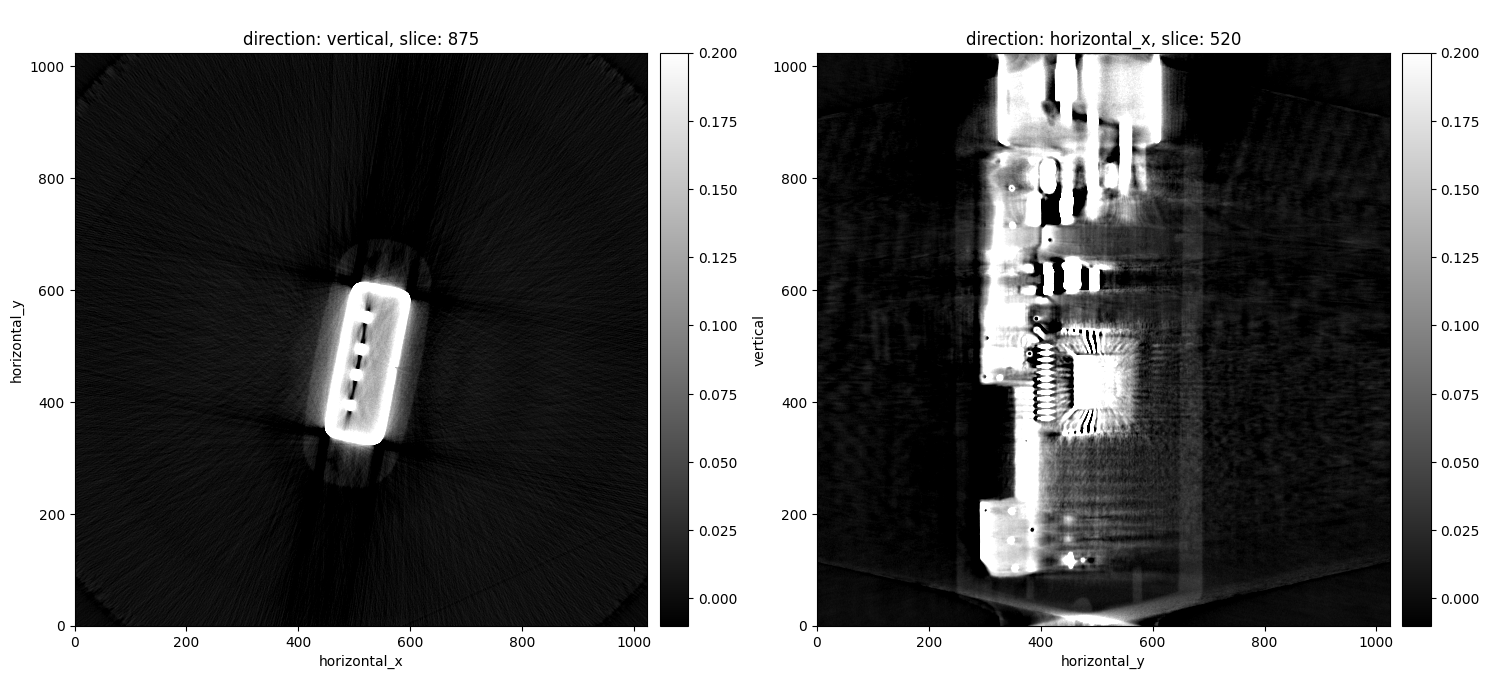

In [128]:
show2D(recon, slice_list=[('vertical',875), ('horizontal_x', 520)], fix_range=(-0.01, 0.2))

In [129]:
recon.as_array().shape

(1024, 1024, 1024)

(-0.5, 1023.5, 1023.5, -0.5)

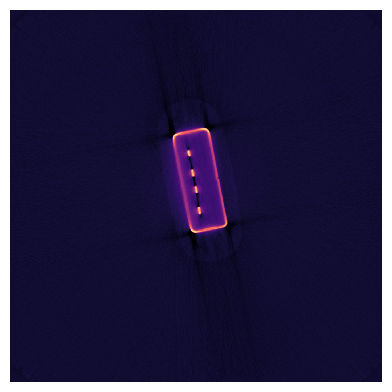

In [147]:
datos_img = recon.as_array()[870,:,:].copy()
marg_min = -0.10

for i in range(0, datos_img.shape[0]):
    for j in range(0, datos_img.shape[1]):
        if datos_img[i,j] < marg_min:
            datos_img[i,j] = marg_min

imagen = matshow(datos_img, cmap='magma')
axis('off')

(-0.5, 1023.5, 1023.5, -0.5)

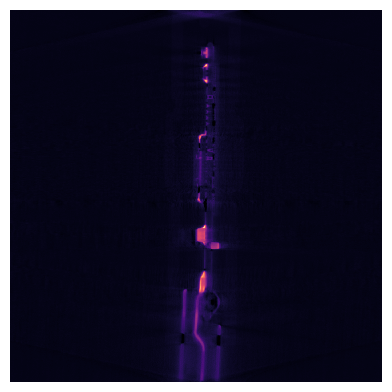

In [148]:
datos_img = recon.as_array()[:,490,:].copy()
marg_min = -0.10

for i in range(0, datos_img.shape[0]):
    for j in range(0, datos_img.shape[1]):
        if datos_img[i,j] < marg_min:
            datos_img[i,j] = marg_min

imagen = matshow(datos_img, cmap='magma')
axis('off')